In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from matplotlib import rcParams as rc
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.tri as tri
   

In [2]:
rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=3
rc['lines.markersize']=8
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

300
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.01', 'Ta0.01', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.01', 'Ta10.0', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.01', 'Ta50.0', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.1', 'Ta0.01', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.1', 'Ta10.0', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F0.1', 'Ta50.0', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confined', 'non-interacting', 'gas', 'T0.01', 'F1.0', 'Ta0.01', 'Esoft0', 'R017', 'Na200', 'blocksize10', 'RDP.npz']
['analyze', 'traj', 'Confin

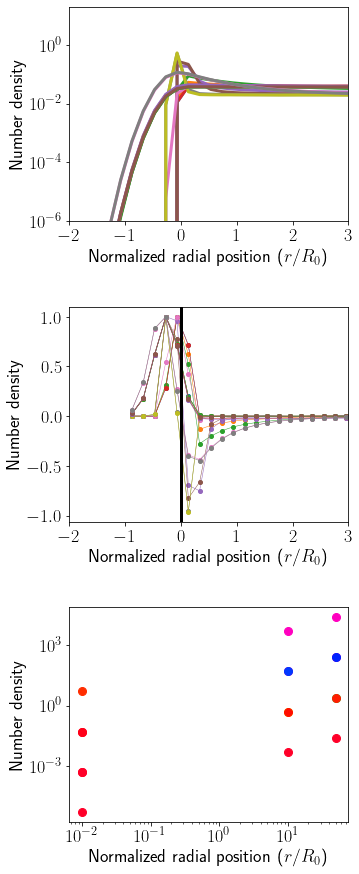

In [8]:
fig,axes=plt.subplots(3,1,figsize=(5,15),gridspec_kw={'wspace':0.4, 'hspace':0.4})

# [[ax1,ax2],[ax3,ax4]]=axes
[ax1,ax3,ax4]=axes
ind=5
nvals=[300,100]

norm = mpl.colors.Normalize(vmin=0, vmax=0.6)
cmap = cm.gist_rainbow
m = cm.ScalarMappable(norm=norm, cmap=cmap)
# print(m.to_rgba(x))
X,Y,Z=[],[],[]
w=0
for jj,fpath in enumerate(['../Non-interacting_gas_confined/']):
    nn=nvals[jj]
    # if jj==0: continue

    print(nn)
    for fname in os.listdir(fpath):
        if '.npz' in fname and 'RDP' in fname:
            print(fname.split('_'))
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            
            # print(T,F,Ta,Esoft,R0)
            
            # if kb!=5: continue
            # print(tau_p(1,kb,nn),kb,nn)
            # if 0.5<Ta/tau_p(1,kb,nn)<1.5: c='g'
            if True:
                npzfile=np.load(fpath+fname)
                
                bin_w=R0/npzfile['bins'].shape[0]
                # if Ta>t1: continue
                ax1.plot(R0-npzfile['bins'],npzfile['hist'][0], '-',label='($\\tau_a={:.0f}$)'.format(Ta,))
                drho=-np.gradient(npzfile['hist'][0])/(np.gradient(npzfile['bins']))
                
                drho=np.array([xx/max(drho) for xx,yy in zip(drho,npzfile['bins'])  if yy<R0+1 and yy>R0-5])
                

                drho_bins=np.array([R0-xx for xx in npzfile['bins'] if xx<R0+1 and xx>R0-5])
                # p,pcov=curve_fit(fit_func,drho_bins,drho)
                # print(p)
                if np.any(drho<0):cval=-min(drho)
                else: cval=0

                ax3.plot(drho_bins, drho, '.-',lw=0.5)
                ax4.loglog(Ta,F**2*Ta/(0.2*T),'o',c=m.to_rgba(cval))
                # ax3.plot(np.linspace(0,10,50), fit_func(np.linspace(0,10,50), p[0],p[1],p[2],p[3],p[4]),'k--',lw=0.5)
                # ax1.set_title('$T={}\ F={}$'.format(T,F))
                Y.append(F**2*Ta/(0.2*T))
                X.append(Ta)
                Z.append(cval)
                
                # print('{:.2f}'.format(Ta/t1), cval)
                # ax1.set_xlim(-1,R0+1)
                # ax1.plot(npzfile['bins']/R0,npzfile['hist'][0], '-',label='Equilibrium')
            
            # if Ta/tau_p(1,kb,nn)>1:
            #     ax3.plot(npzfile['bins']/R0, npzfile['hist'][0])
            
            # if Ta/tau_p(1,kb,nn)<1:
            #     ax4.plot(npzfile['bins']/R0, npzfile['hist'][0])
            
            if False:
                npzfile=np.load(fpath+fname)
                bin_w=R0/npzfile['bins'].shape[0]
                ax2.plot(npzfile['bins']/R0,npzfile['hist'][0], '-',label='$F={}$ $\\tau_a={:.1f}\ (\\tau_1={:.0f})$'.format(F,Ta,t1))
                ax4.plot(npzfile['bins']/R0, -np.gradient(npzfile['hist'][0]/(np.gradient(npzfile['bins']))))
            
print(w,len(X))
for axi in axes.flatten():
    # handles, labels = axi.get_legend_handles_labels()
    # #print(labels)
    # hl = sorted(zip(handles, labels),
    #         key=lambda x: float(x[1].split('=')[1].replace('$','')))
    # handles2, labels2 = zip(*hl)
    # #print(labels2)
    # axi.legend(handles2, labels2,)
    # axi.legend(loc='lower left',bbox_to_anchor=(1.1,0.1))
    axi.set_yscale('log')
    # axi.set_xscale('log')
    # axi.grid(True)
    # axi.set_xlim([-1,6])
    
    axi.set_xlabel('Normalized radial position ($r/R_0$)')
    axi.set_ylabel('Number density')
ax3.set_yscale('Linear')
# ax4.set_yscale('SymLog')

ax4.set_xscale('Log')
ax4.set_yscale('Log')
# ax4.set_xlim(1e-2,10)
# ax4.set_ylim(1e-2,1e3)

ax1.set_ylim([1e-6,20])
ax1.set_xlim([-2,3])
ax3.set_xlim([-2,3])
ax3.axvline(0,c='k')


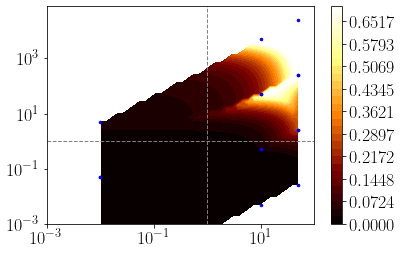

In [10]:
Xi,Yi=np.meshgrid(np.logspace(-3,2,50),np.logspace(-3,4,50))
triang=tri.Triangulation(X,Y)
interpZ=tri.LinearTriInterpolator(triang,Z)
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.linspace(0,0.7,30),cmap='afmhot')#,alpha=0.6)
        #ax.contour(Xi, Yi, Zi,colors='k',levels=levels,linewidths=0.3)

plt.plot(X,Y,'.',c='b',markersize=5)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-2,10)
# plt.ylim(6e-2,2e2)
plt.axhline(1,c='0.5',ls='--',lw=1)
plt.axvline(1,c='0.5',ls='--',lw=1)
# plt.grid(True,alpha=0.5,which='both')

plt.colorbar()